In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
mean_fare = np.round(np.mean(df.Fare))
mean_fare
median_fare = np.round(np.median(df.Fare))
median_fare
q0 = np.quantile(df.Fare, 0.0)
q1 = np.round(np.quantile(df.Fare, 0.25))
q3 = np.round(np.quantile(df.Fare, 0.75))
q4 = np.round(np.quantile(df.Fare, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.0
Q3: 31.0
Q4: 512.0


In [4]:
import seaborn as sns

<AxesSubplot:ylabel='Fare'>

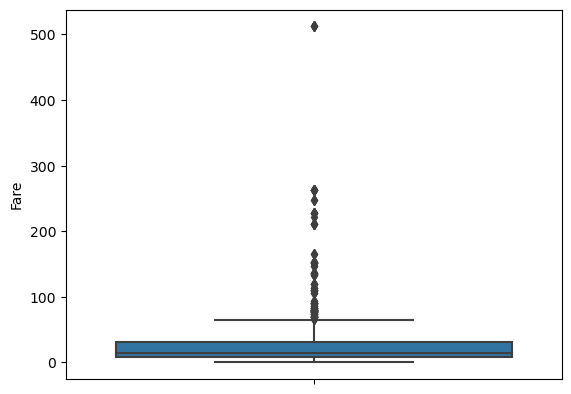

In [5]:
#Rozkład zmiennej Fare
sns.boxplot(y='Fare',data=df)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,750.000000,750.000000,750.000000,592.000000,750.000000,750.000000,750.000000
mean,445.746667,0.325333,2.508000,28.703125,0.438667,0.337333,16.477733
std,260.420103,0.468812,0.711766,14.344089,0.910317,0.790172,11.581224
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,449.500000,0.000000,3.000000,28.000000,0.000000,0.000000,12.281250
75%,670.750000,1.000000,3.000000,36.000000,1.000000,0.000000,25.840625
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,53.100000


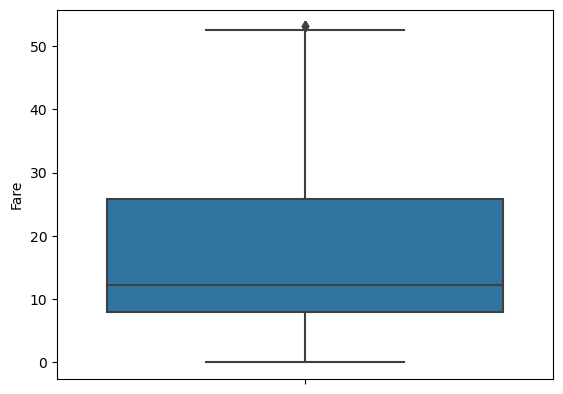

In [7]:
#Podejście 1: Transformacja zmiennej Fare ze względu na dużą liczbę zmiennych odstających, zakres ograniczony,żeby wyciąć obserwacje odstające
fare1 = df[df['Fare']<55]
sns.boxplot(y='Fare',data=fare1)
fare1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,29.249672
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,34.116100
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,150.000000


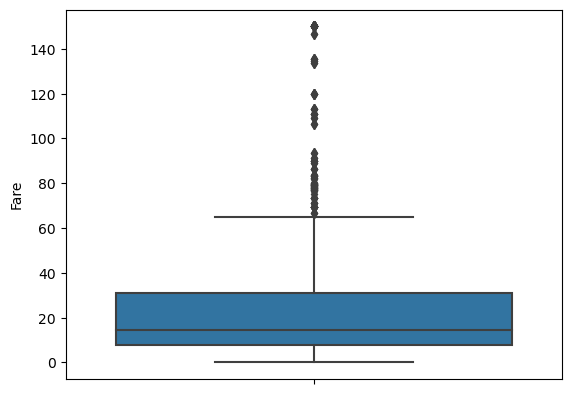

In [8]:
#Podejście 2: Transformacja zmiennej Fare bez pomniejszania liczby wierszy - wartości większe od 150 zostały zastąpione wartością 150.
df['Fare'] = np.where(df['Fare'] >150, 150, df['Fare'])
sns.boxplot(y='Fare',data=df)    
df.describe()

In [9]:
#Podejście 3: Transformacja zmiennej Fare - stworzenie 4 grup o takiej samej liczebności. 
df['Fare_Band'] = pd.qcut(df['Fare'], q=4)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 150.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.0, 150.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.91, 14.454]"


In [10]:
df['Fare_Band'].value_counts()

(7.91, 14.454]    224
(-0.001, 7.91]    223
(14.454, 31.0]    222
(31.0, 150.0]     222
Name: Fare_Band, dtype: int64

In [11]:
#Przypisanie wartości Fare do odpowiednich grup (0,1,2 lub 3).
df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,C,"(31.0, 150.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,S,"(31.0, 150.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S,"(7.91, 14.454]"
